In [ ]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Constants
r   = 0.226
d   = 0.065
g   = 9.81
R   = 0.324
j_1 = 0.0633
j_2 = 0.007428
m_1 = 3.294
m_2 = 1.795
k_e = 0.00638
k_t = 0.00852
T_v = 0.140

In [ ]:
# Motor speed to Robot Angular Velocity
A = -2*j_2 - 2*d*d*m_2 + d*r*m_2
B = -2*g*d*m_2
C = j_1 + 2*j_2 + r*r*m_1 + (2*d*d-3*d*r+r*r)*m_2
D = T_v
E = 2*g*d*m_2

num1 = np.multiply([A, 0, B], 1/C)
den1 = np.multiply([C, D, E], 1/C)

H_motorSpeedToRobotVelocity = control.tf(num1, den1)
print('H_motorSpeedToRobotVelocity(s) = ', H_motorSpeedToRobotVelocity)
(p1, z1) = control.pzmap(H_motorSpeedToRobotVelocity, False)
print('poles = ', p1)
print('zeros = ', z1, end='\n\n')

t1, f1 = control.step_response(H_motorSpeedToRobotVelocity)
plt.plot(t1, f1)
plt.grid()

H_voltageToRobotVelocity(s) =  
       -0.02312 s^2 - 14.48
----------------------------------
s^3 + 0.4945 s^2 + 88.99 s + 38.46

poles =  [-0.03113152+9.43210228j -0.03113152-9.43210228j -0.43225385+0.j        ]
zeros =  [0.+25.02550406j 0.-25.02550406j]



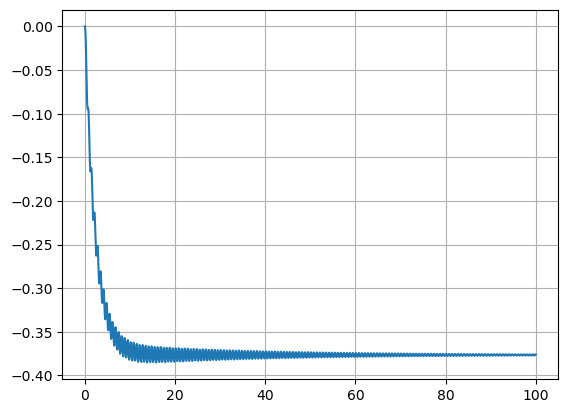

In [11]:
# Voltage to Robot Angular Velocity
A = -2*d*g*k_t*m_2
B = k_t*(-2*j_2 + d*(-2*d+r)*m_2)
C = -d*g*R*T_v*m_2 + 2*d*g*k_e*k_t*m_2
D = -T_v*k_e*k_t + d*g*R*j_1*m_2 + d*g*r*r*R*m_1*m_2 + d*g*r*r*R*m_2*m_2
E = -R*T_v*j_2 + 2*j_2*k_e*k_t - d*d*R*T_v*m_2 + k_e*k_t*(j_1 + r*r*m_1 
        + (2*d*d - 3*d*r + r*r)*m_2)
F = d*d*R*j_1*m_2 + d*d*r*r*R*m_1*m_2 + R*j_2*(j_1 + r*r*(m_1 + m_2))

num2 = np.multiply([B, 0, A], 1/F)
den2 = np.multiply([F, -E, D, -C], 1/F)

H_voltageToRobotVelocity = control.tf(num2, den2)
print('H_voltageToRobotVelocity(s) = ', H_voltageToRobotVelocity)
(p2, z2) = control.pzmap(H_voltageToRobotVelocity, False)
print('poles = ', p2)
print('zeros = ', z2, end='\n\n')

t2, f2 = control.step_response(H_voltageToRobotVelocity, np.linspace(0, 100, 1000))
plt.plot(t2, f2)
plt.grid()

In [ ]:
# Voltage to Pendulum Angular Velocity
A = -d*g*R*T_v*m_2 + 2*d*g*k_e*k_t*m_2
B = -T_v*k_e*k_t + d*g*R*j_1*m_2 + d*g*r*r*R*m_1*m_2 + d*g*r*r*R*m_2*m_2
C = -R*T_v*j_2 - d*d*R*T_v*m_2 + k_e*k_t*(j_1 + 2*j_2 + r*r*m_1 + 
        (2*d*d - 3*d*r + r*r)*m_2)
D = R*j_1*j_2 + d*d*R*j_1*m_2 + d*d*r*r*R*m_1*m_2 + r*r*R*j_2*(m_1 + m_2)
E = k_t*(j_1 + 2*j_2 + r*r*m_1 + (2*d*d - 3*d*r + r*r)*m_2)
F = -k_t*T_v
G = 2*d*g*m_2*k_t

num3 = np.multiply([E, -F, G], 1/D)
den3 = np.multiply([D, -C, B, -A], 1/D)

H_voltageToPendulumVelocity = control.tf(num3, den3)
print('H_voltageToPendulumVelocity(s) = ', H_voltageToPendulumVelocity)
(p3, z3) = control.pzmap(H_voltageToPendulumVelocity, False)
print('poles = ', p3)
print('zeros = ', z3, end='\n\n')

t3, f3 = control.step_response(H_voltageToPendulumVelocity, np.linspace(0, 100, 1000))
plt.plot(t3, f3)
plt.grid()

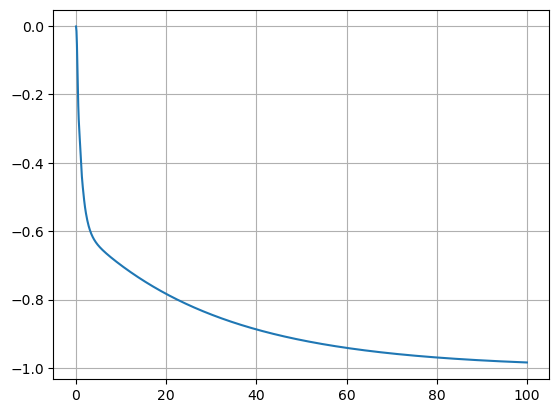

In [10]:
# PID controller for The Angular Velocity of the Robot
K_p = 3.66
K_i = 0.2
K_d = 0.05
C = control.tf([K_d, K_p, K_i], [1, 0])
W = control.series(control.feedback(control.series(C, H_voltageToPendulumVelocity), 1),
                        H_motorSpeedToRobotVelocity)

#W = control.tf(control.series(H_voltageToPendulum, H_speedToRotation))
t4, f4 = control.step_response(W, np.linspace(0, 100, 1000))
plt.plot(t4, f4)

# Testing
W = control.feedback(control.series(C, H_voltageToPendulumVelocity), 1)
tt, ff = control.step_response(W, np.linspace(0, 100, 1000))
#plt.plot(tt, ff)

plt.grid()


     1.734 s^2 + 0.8856 s + 14.48
--------------------------------------
s^4 + 0.4945 s^3 + 88.99 s^2 + 38.46 s


         -0.02312 s^2 - 14.48
--------------------------------------
s^4 + 0.4945 s^3 + 88.99 s^2 + 38.46 s


1.711 s^6 + 1.732 s^5 + 152.7 s^4 + 144.6 s^3 + 34.06 s^2 - 2.274e-13 s
------------------------------------------------------------------------
s^8 + 0.989 s^7 + 178.2 s^6 + 164.9 s^5 + 7958 s^4 + 6845 s^3 + 1479 s^2



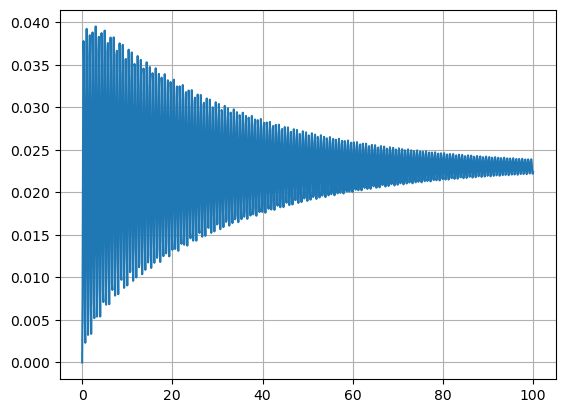

In [12]:
nesto = control.series(H_voltageToPendulumVelocity, control.tf([1], [1, 0]))
print(nesto)
nesto2 = control.series(H_voltageToRobotVelocity, control.tf([1], [1, 0]))
print(nesto2)
t3, f3 = control.step_response(control.parallel(nesto, nesto2), np.linspace(0, 100, 1000))
print(control.parallel(nesto, nesto2))
plt.plot(t3, f3)
plt.grid()